# US Parks Biodiversity
The goal of this project is to analyze biodiversity data from the National Parks Service, particularly observations from species in different US national parks.


This project will analyze, prepare, plot data and explain the findings from the analysis.

Here are a few questions that this project has sought to answer:

- What is the distribution of conservation status for all species?
- Which are the three most common species in every park?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?


#### Data sources:

Both `Observations.csv` and `Species_info.csv` were provided by [Codecademy.com](codecademy.com).

Note: The data for this project is inspired by real data, but is mostly fictional.

## Introduction
The goal of this project is to extract information from the data given, and use that information to answer the questions presented. The proposed structure of the work consists of the following segments:

#### Data
First, we will have to acquire and clean the data that will be analyzed for the answer to the questions. In this particular project, we are already given two csv files that contain the data needed:

- `Observations.csv` - contains the number of observations of unique species across US national parks. It covers 7 days of observations.
- `Species_info.csv` - contains the conservation status as well as category for every species.

#### Analysis
Once the data has a consistent format, is correct and complete, we can apply descriptive statistics and data visualization methods to understand the data better, and to attempt to answer the project questions. We will perform the following steps:

1. Describe the variables in the dataset, by looking at:
    - Distribution of the conservation status of the species
    - Counts of the different variables
    - Proportions of species in each conservation status
2. Perform statistical tests

#### Conclusion
Lastly, we will return to the project goal questions and check if the output of the analysis can answer the questions set in the project goals, we will also make a reflection of what was learned through this project and what further research can be done, given what we have learned from our analysis.

## Data
First, we must import the most important libraries and tools that we will be using to handle the data

In [1]:
#Numerical and data manipulation libraries
import pandas as pd
import numpy as np
#Plotting and visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
#Other tools
import os
%matplotlib inline

### First peek at the files
As mentioned, the data consists of two files, we will import them as `DataFrame` objects to manipulate them with Python. Since `DataFrames` are objects that behave somewhat like tables, we show what columns are present in each `DataFrame`

In [2]:
observations = pd.read_csv(os.path.join(
    'data','observations.csv'), encoding='utf-8')
species = pd.read_csv(os.path.join(
    'data','species_info.csv'), encoding='utf-8')

#### Observations
The observations `DataFrame` contains information from recorded sightings of different species throughout the national parks. The columns included are:

- **scientific_name** - The scientific name of each species
- **park_name** - The name of the national park
- **observations** - The number of observations in a period of 7 days


In [3]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


#### Species
The species `DataFrame` contains information about the conservation status of each species, as well as their category. The columns are:

- **category** - The taxonomical class for each species
- **scientific_name** - The scientific name of each species
- **common_names** - The common names of each species
- **conservation_status** - The species conservation status


In [4]:
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


### Cleaning the data
Now that we know what columns are in the different `DataFrames`, we should ensure that there are no missing values, that every point in the columns has a consistent formatting and that the data types are suitable for manipulation with Python.

#### Observations
We can see that there are 23,296 inputs, each one corresponding to a number of observations of a species in a national park location. We can see that there are no missing values for any column.

In [5]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


There are 4 US national parks represented in this data:
- Great Smoky Mountains National Park
- Yosemite National Park
- Bryce National Park
- Yellowstone National Park

In [6]:
#Each park has the same number of entries in the dataset
observations.park_name.value_counts()

Great Smoky Mountains National Park    5824
Yosemite National Park                 5824
Bryce National Park                    5824
Yellowstone National Park              5824
Name: park_name, dtype: int64

Since there are 5,541 unique species in all the parks, we will not list every one of them. In the analysis section, we will extract more information about them.

In [7]:
observations.scientific_name.nunique()

5541

We can see that there are no inputs with zero observations, the `minimum` number of observations for a species is 9 and the `maximum` is 321

In [8]:
observations.observations.describe()

count    23296.000000
mean       142.287904
std         69.890532
min          9.000000
25%         86.000000
50%        124.000000
75%        195.000000
max        321.000000
Name: observations, dtype: float64

#### Species
For the species dataset, we have columns that contain strings as values. There seems to be a lot of missing information in the `conservation_status` column.

In [9]:
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


We see that the `conservation_status` column has NaN values where the species is not in danger, we will substitute all NaN with a more explicit category 'no danger'.
With this, we can see that the vast majority of species is not in danger

In [10]:
species.conservation_status.fillna('No danger', inplace=True)
species.conservation_status.value_counts()

No danger             5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: conservation_status, dtype: int64

From the summary statistics of the columns, we can see that _Vascular plant_ is the most common category, that the number of unique scientific names is 5,541, which corresponds with the number seen in the observations `DataFrame`. We can also see that some species share the same common names

In [11]:
species.describe()

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,5824
unique,7,5541,5504,5
top,Vascular Plant,Castor canadensis,Brachythecium Moss,No danger
freq,4470,3,7,5633


In [12]:
print(f'There are {species.category.nunique()} different categories of species')
print(f'Which are: {species.category.unique()}')

There are 7 different categories of species
Which are: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


<hr>

## Analysis


    Describe the variables in the dataset, by looking at:
        Distribution of the conservation status of the species
        Counts of the different variables
        Proportions of species in each conservation status
    Perform statistical tests


#### Distribution of the conservtion status of the species

In [13]:
conservationCategory = species[species.conservation_status != "No danger"]\
    .groupby(["conservation_status", "category"])['scientific_name']\
    .count()\
    .unstack()

conservationCategory

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


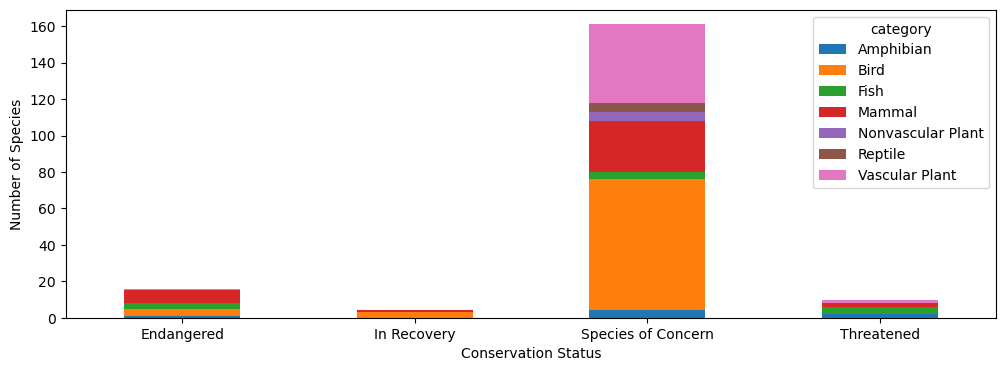

In [14]:
ax = conservationCategory.plot(kind = 'bar', figsize=(12,4), 
                               stacked=True)
plt.xticks(rotation=0)
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species")
plt.savefig('conservation_status_distribution.png', transparent=True)

As seen previously, the majority of species are not endangered, and of those with a status of conservation, most are in a status _species of concern_. Birds, mammals and Vascular plants are the categories with the most species in this status of conservation.

#### Most common species in each park
Grouping the data by observations, we can see which are the most common species in each national park

In [15]:
most_common_by_park = []
for park in observations.park_name.unique():
    temp = observations[ observations.park_name == park ].groupby('scientific_name')\
        .observations.sum().reset_index()
    temp = temp.sort_values('observations', ascending=False)
    temp['park_name'] = park
    most_common_by_park.append(temp[:3])
    
    
#Transform the list into a dataframe
most_common_by_park = pd.concat(most_common_by_park)
print(most_common_by_park.head())

            scientific_name  observations                            park_name
4993  Streptopelia decaocto           256  Great Smoky Mountains National Park
4109          Procyon lotor           247  Great Smoky Mountains National Park
1103      Castor canadensis           243  Great Smoky Mountains National Park
2555   Hypochaeris radicata           505               Yosemite National Park
1103      Castor canadensis           501               Yosemite National Park


It would be more simple for most readers to know the common names of the species in the _most_common_by_park_ table, therefore we are going to add this information to the table, using the _species_ `DataFrame`

In [16]:
def get_common_names(scientific_name):
    common_names_list = species[ species['scientific_name'] == scientific_name ]['common_names']
    concatenated_names = common_names_list.str.cat(sep=',')
    clean_names_without_duplicates = {i.strip() for i in concatenated_names.split(',')}
    return list(clean_names_without_duplicates)
most_common_by_park['common_names'] = most_common_by_park['scientific_name'].apply(get_common_names)
most_common_by_park.head()

,scientific_name,observations,park_name,common_names
4993,Streptopelia decaocto,256,Great Smoky Mountains National Park,"[Eurasian Collared Dove, Eurasian Collared-Dove]"
4109,Procyon lotor,247,Great Smoky Mountains National Park,"[Common Raccoon, Raccoon, Northern Raccoon]"
1103,Castor canadensis,243,Great Smoky Mountains National Park,"[Beaver, American Beaver]"
2555,Hypochaeris radicata,505,Yosemite National Park,"[Spotted Cat's-Ear, False Dandelion, Cat's Ear..."
1103,Castor canadensis,501,Yosemite National Park,"[Beaver, American Beaver]"


In [17]:
for park in most_common_by_park.park_name.unique():
    data = most_common_by_park[most_common_by_park.park_name == park]
    print(f'The 3 most common species in the {park} are:')
    for idx in range(3):
        row = data.iloc[idx]
        print(f'\t{row.common_names[0]}, seen {row.observations} times')

The 3 most common species in the Great Smoky Mountains National Park are:
	Eurasian Collared Dove, seen 256 times
	Common Raccoon, seen 247 times
	Beaver, seen 243 times
The 3 most common species in the Yosemite National Park are:
	Spotted Cat's-Ear, seen 505 times
	Beaver, seen 501 times
	Common Velvet Grass, seen 463 times
The 3 most common species in the Bryce National Park are:
	Rock Dove, seen 339 times
	Mountain Lion, seen 311 times
	Wild Oats, seen 303 times
The 3 most common species in the Yellowstone National Park are:
	Common Velvet Grass, seen 805 times
	Eurasian Collared Dove, seen 771 times
	Mountain Lion, seen 753 times


#### Species more likely to be endangered
The next question is if certain types of species are more likely to be endangered? This can be answered by creating a new column called is_protected and include any species that had a value other than No danger.

In [18]:
species['is_protected'] = species.conservation_status != 'No danger'

Once the new column is created, group by category and is_protected to show the break down of each species type and protection status.

It's easy to see that Birds, Vascular Plants, and Mammals have a higher absolute number of species protected.

In [19]:
category_counts = species.groupby(['category', 'is_protected'])\
                        .scientific_name.nunique()\
                        .reset_index()\
                        .pivot(columns='is_protected',
                                      index='category',
                                      values='scientific_name')\
                        .reset_index()
category_counts.columns = ['category', 'not_protected', 'protected']

category_counts

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


Absolute numbers are not always the most useful statistic, therefore it's important to calculate the rate of protection that each category exhibits in the data. From this analysis, one can see that ~17 percent of mammals were under protection, as well as ~15 percent of birds.

In [20]:
category_counts['percent_protected'] = category_counts.protected / \
                                      (category_counts.protected + category_counts.not_protected)
#To present the results in the slide deck
category_counts['percent_protected'] = category_counts['percent_protected'].apply(lambda x: f'{x:.2%}')

category_counts

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.86%
1,Bird,413,75,15.37%
2,Fish,115,11,8.73%
3,Mammal,146,30,17.05%
4,Nonvascular Plant,328,5,1.50%
5,Reptile,73,5,6.41%
6,Vascular Plant,4216,46,1.08%


#### Statistical Significance

This section will run some chi-squared tests to see if different species have statistically significant differences in conservation status rates. In order to run a chi squared test, a contingency table will need to be created. The contingency table should look like this:

||protected|not protected|
|-|-|-|
|Mammal|?|?|
|Bird|?|?|

The first test will be called `contingency1` and will need to be filled with the correct numbers for mammals and birds.

The results from the chi-squared test returns many values, the second value which is 0.69 is the p-value. The standard p-value to test statistical significance is 0.05. For the value retrieved from this test, the value of 0.69 is much larger than 0.05. In the case of mammals and birds there doesn't seem to be any significant relationship between them i.e. the variables independent. 

In [21]:
from scipy.stats import chi2_contingency

contingency1 = [[30, 146],
              [75, 413]]
chi2_contingency(contingency1)

(0.1617014831654557,
 0.6875948096661336,
 1,
 array([[ 27.8313253, 148.1686747],
        [ 77.1686747, 410.8313253]]))

The next pair, is going to test the difference between `Reptile` and `Mammal`.

The format is again is like below:

||protected|not protected|
|-|-|-|
|Mammal|?|?|
|Reptile|?|?|

This time the p-value is 0.039 which is below the standard threshold of 0.05 which can be take that the difference between reptile and mammal is statistically significant. Mammals are shown to have a statistically significant higher rate of needed protection compared with Reptiles. 

In [22]:
contingency2 = [[30, 146],
               [5, 73]]
chi2_contingency(contingency2)

(4.289183096203645,
 0.03835559022969898,
 1,
 array([[ 24.2519685, 151.7480315],
        [ 10.7480315,  67.2519685]]))

<hr>

## Conclusion
#### Answers to the project goals
- What is the distribution of conservation status for all species?
    <br>
Most of the species are not in danger of becoming extinct: only 191 out of 5,541 species are in a status of conservation. Of those in a conservation status, the majority are `species of concern` with 161 species in this category.
    <br>
    <br>
- Which are the three most common species in every park?
    <br>
   
    The 3 most common species in the Great Smoky Mountains National Park are:
        Eurasian Collared Dove, seen 256 times
        Common Raccoon, seen 247 times
        Beaver, seen 243 times
    The 3 most common species in the Yosemite National Park are:
        Spotted Cat's-Ear, seen 505 times
        Beaver, seen 501 times
        Common Velvet Grass, seen 463 times
    The 3 most common species in the Bryce National Park are:
        Rock Dove, seen 339 times
        Mountain Lion, seen 311 times
        Wild Oats, seen 303 times
    The 3 most common species in the Yellowstone National Park are:
        Common Velvet Grass, seen 805 times
        Eurasian Collared Dove, seen 771 times
        Mountain Lion, seen 753 times
    <br>
- Are certain types of species more likely to be endangered?
    <br>
    Yes. By percentage of species in conservation status, birds and mammals are more prone to be endangered
    <br>
    <br>
- Are the differences between species and their conservation status significant? <br>
    Some are. _Mammals_ do not have significant statistical difference from _birds_, whereas _mammals_ are more statistically likely than _reptiles_ to be endangered.

#### Further research
More information can be gathered to answer other questions, like
- Changes of conservation status over the years
- How does location and size of the parks affect the distribution of species?
- Does park funding affect conservation efforts?